## Canny边缘检测

Canny边缘检测是一种流行的边缘检测算法，是由John Canny在1986年提出的，它是一个多阶段的算法，即由多个步骤构成。

    1.图像降噪：

    由于边缘检测容易受到图像中噪声的影响，因此第一步是使用5x5高斯滤波器消除图像中的噪声。

    2.计算图像梯度：

    然后使用水平和垂直方向的Sobel核过滤平滑图像，以获得水平方向和垂直方向的一阶导数。从这两个图像中，我们可以找到每个像素的边缘渐变和方向。

    3.非极大值抑制：

    获得梯度大小方向后，对图像进行全面扫描以删除不构成边缘的任何不需要的像素。为此，在每个像素处，检查是否为渐变方向上其邻域的局部最大值。

    点A位于边缘（垂直方向）。渐变方向垂直于边缘。点B和C处于梯度方向。因此，将点A与点B和C进行对比，以查看它是否形成局部最大值。如果不是它将被抑制（设置为0）。

    最后我们得到的结果是具有“细边”的二进制图像

![](images/2023-08-14-11-37-21.png)


    4.阈值筛选：

    这个阶段用来筛选轮廓。为此我们需要两个阈值，minVal和maxAal。梯度大于maxVal的边缘肯定是边缘，而低于minVal的边缘将丢弃，两个阈值之间的那些根据其连通性被分类为边或非边。如果他们连接到确定边缘，则被视为一部分。否则将被丢弃。

    ![](images/2023-08-14-11-38-55.png)

    边 A 高于 maxVal，因此被视为“确定边”。虽然边 C 低于 maxVal，但它连接到边 A，因此这也被认为是有效的边，我们得到完整的曲线。但是边缘B，尽管它高于minVal并且与边缘C位于同一区域，但它没有连接到任何“确定边缘”，因此被丢弃。因此，我们必须相应地选择minVal和maxVal才能获得正确的结果，这一点非常重要。Canny推荐的高低阈值比在2：1到3：1之间。

OpenCV中的cv.Canny()可以实现该操作。

![](images/2023-08-14-11-39-35.png)

<Figure size 1440x720 with 0 Axes>

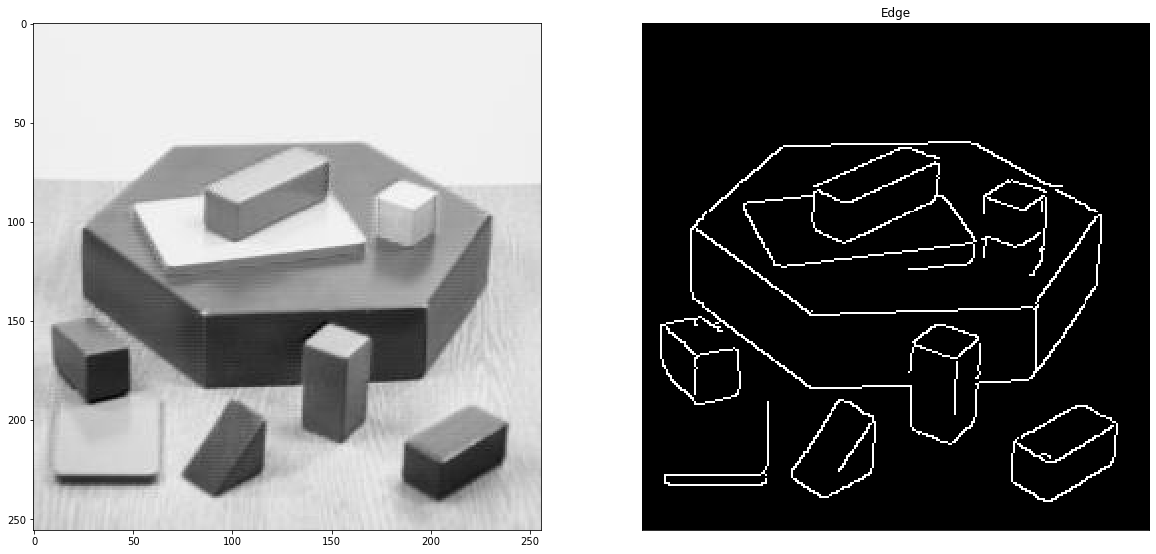

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img = cv.imread('exp_images/corner-detection.jpg')
edges = cv.Canny(img,100,200)

plt.figure(figsize=(20,10))
_,ax_list = plt.subplots(1,2,figsize = (20,10))
ax_list[0].imshow(img,cmap='gray')
plt.title('Original'),plt.xticks([]),plt.yticks([])
ax_list[1].imshow(edges,cmap='gray')
plt.title('Edge'),plt.xticks([]),plt.yticks([])
plt.show()